# GMSL Analysis and Prediction

## Global temperatures dataset (https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalTemperatures.csv)

U okviru ovog skupa podataka nalaze se podaci o globalnoj temperaturi zemlje, okeana i kopna, u periodu od 1750. do 2015. godine.

Podaci koji su od interesa za naš rad su:

* dt - datum merenja
* LandAverageTemperature - prosečna temperatura kopna za dan merenja
* LandAndOceanAverageTemperature - prosečna temperatura kopna i mora za dan merenja

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('original_datasets/GlobalTemperatures.csv', delimiter=',')

In [106]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [108]:
df.drop(['LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperatureUncertainty'], axis=1, inplace=True)

In [109]:
df.rename(columns={'dt':'Date'}, inplace = True)

In [110]:
df.head()

,Date,LandAverageTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN
1,1750-02-01,3.083,NaN
2,1750-03-01,5.626,NaN
3,1750-04-01,8.490,NaN
4,1750-05-01,11.573,NaN


In [111]:
df['Date'] = pd.to_datetime(df['Date'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            3192 non-null   datetime64[ns]
 1   LandAverageTemperature          3180 non-null   float64       
 2   LandAndOceanAverageTemperature  1992 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 74.9 KB


In [113]:
df.shape

(3192, 3)

In [114]:
df.isna().sum()

Date                                 0
LandAverageTemperature              12
LandAndOceanAverageTemperature    1200
dtype: int64

In [115]:
df.nunique()

Date                              3192
LandAverageTemperature            2839
LandAndOceanAverageTemperature    1596
dtype: int64

#### Skup podataka poseduje 3192 redova i isti toliki broj jedinstvenih datuma. Zaključujemo da nemamo duplikata.
#### Datume pre 1850 godine nećemo razmatrati i samim tim ćemo odstraniti dobar deo nedostajućih vrednosti.

In [116]:
df = df[df['Date'] >= '1850-01-01']

In [117]:
df.head()

,Date,LandAverageTemperature,LandAndOceanAverageTemperature
1200,1850-01-01,0.749,12.833
1201,1850-02-01,3.071,13.588
1202,1850-03-01,4.954,14.043
1203,1850-04-01,7.217,14.667
1204,1850-05-01,10.004,15.507


In [118]:
df.shape

(1992, 3)

In [119]:
df.isna().sum()

Date                              0
LandAverageTemperature            0
LandAndOceanAverageTemperature    0
dtype: int64

In [120]:
df.nunique()

Date                              1992
LandAverageTemperature            1833
LandAndOceanAverageTemperature    1596
dtype: int64

#### Sada su nam podaci i datumi u redu. Dodatno ćemo ukloniti dan merenja jer nam nije potrebna ta informacija.

In [121]:
df['Date'] = df['Date'].dt.strftime('%Y-%m')
df.reset_index(drop=True, inplace=True)
df.head()

,Date,LandAverageTemperature,LandAndOceanAverageTemperature
0,1850-01,0.749,12.833
1,1850-02,3.071,13.588
2,1850-03,4.954,14.043
3,1850-04,7.217,14.667
4,1850-05,10.004,15.507


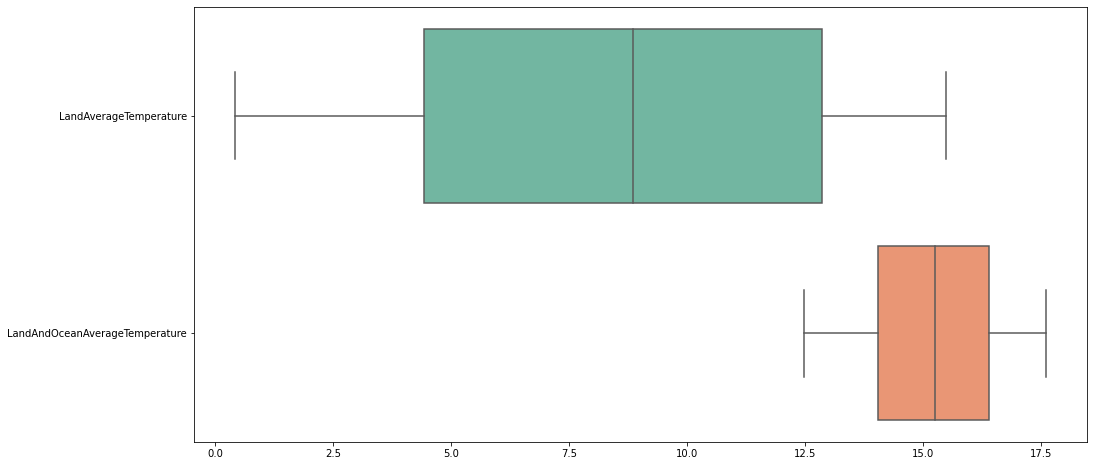

In [122]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

#### Uočili smo da nemamo autlajere.

#### Uzimamo u obzir datume od 1969. do 2013. godine

In [123]:
df = df[(df['Date'] >= '1969-01') & (df['Date'] <= '2013-12')]

In [124]:
df.reset_index(inplace = True)

In [125]:
df.drop('index', axis = 1, inplace = True)

In [126]:
df.head().append(df.tail())

,Date,LandAverageTemperature,LandAndOceanAverageTemperature
0,1969-01,1.966,13.518
1,1969-02,2.450,13.747
2,1969-03,5.131,14.576
3,1969-04,8.576,15.518
4,1969-05,11.354,16.329
535,2013-08,14.742,17.462
536,2013-09,13.154,16.894
537,2013-10,10.256,15.905
538,2013-11,7.424,15.107
539,2013-12,4.724,14.339


In [127]:
df.to_csv('processed_datasets/LandAverageTemp_LandAndOceanAverageTemp.csv', index = False)